In [1]:
import os

os.chdir("..")

In [2]:
import torch
from diffusers.pipelines import FluxPipeline
from src.flux.condition import Condition
from PIL import Image

from src.flux.generate import generate, seed_everything

In [3]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",cache_dir="cache", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")
# pipe.load_lora_weights(
#     "Yuanshi/OminiControl",
#     weight_name=f"omini/subject_512.safetensors",
#     adapter_name="subject",
# )

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [4]:
pipe.load_lora_weights(
    "examples/4000/pytorch_lora_weights.safetensors",
     adapter_name="subject",
)

  0%|          | 0/50 [00:00<?, ?it/s]

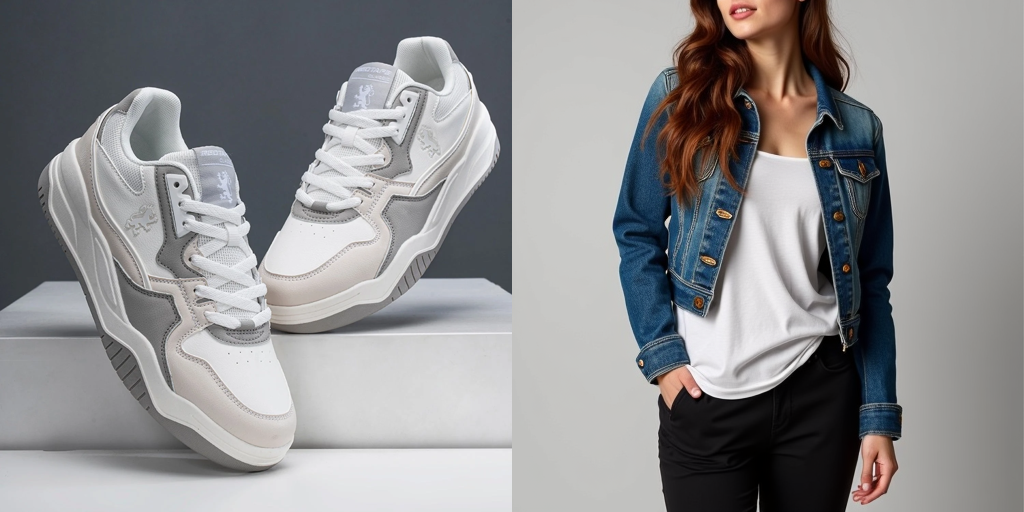

In [7]:
image = Image.open("assets/RSL0562_1.webp").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, -32))

prompt = "A person wearing this item <speZyRi>"
seed_everything(100)

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=50,
    height=512,
    width=512,
).images[0]
concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image
# result_img

In [16]:
seed_everything(90)

In [ ]:
image = Image.open("assets/tshirt.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, -32))

prompt = "in the park, a lady She's wearing this shirt backshot"




result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=50,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

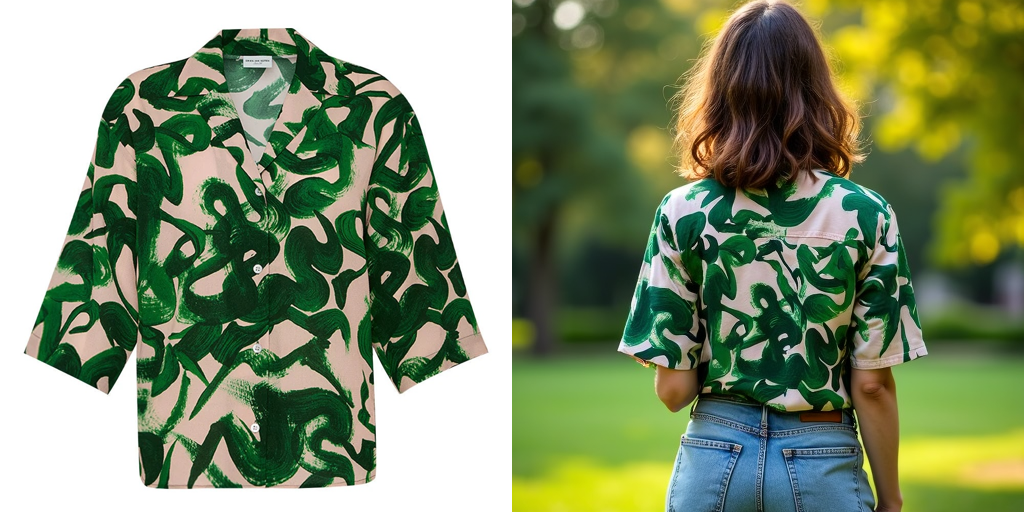

In [20]:
# image = Image.open("assets/tshirt.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

# prompt = "in the park, a lady She's wearing this shirt "


result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=50,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

  0%|          | 0/8 [00:00<?, ?it/s]

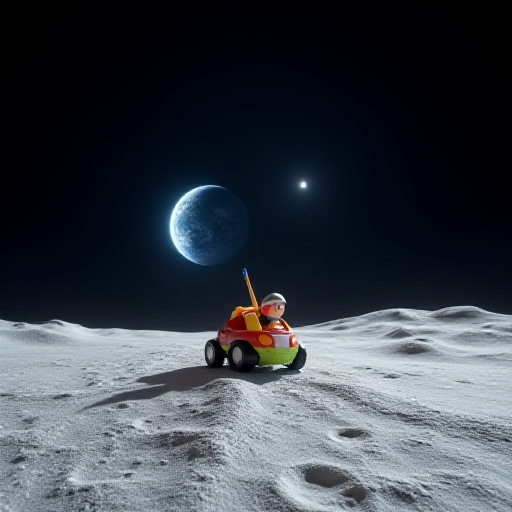

In [14]:
image = Image.open("assets/rc_car.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, -32))

prompt = "A film style shot. On the moon, this item drives across the moon surface. The background is that Earth looms large in the foreground."


result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image
result_img

  0%|          | 0/8 [00:00<?, ?it/s]

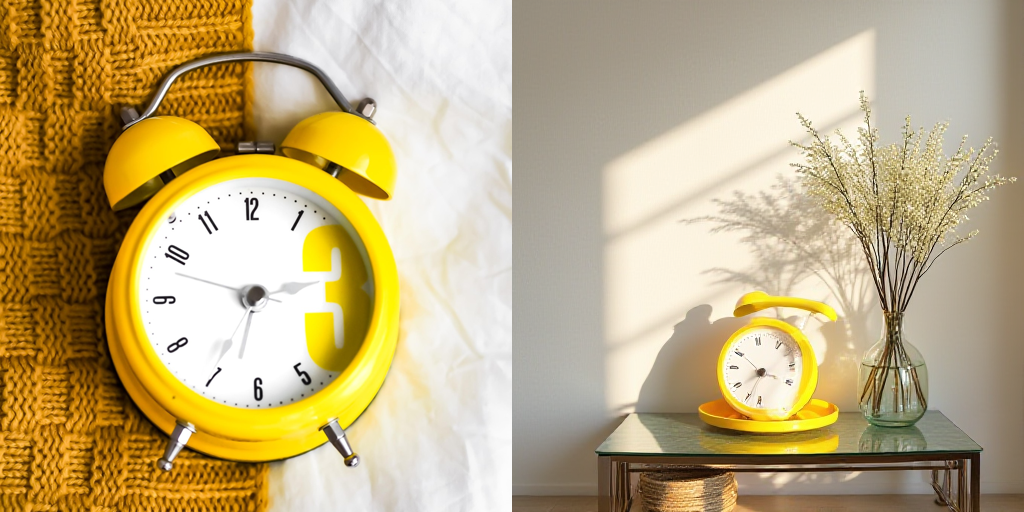

In [18]:
image = Image.open("assets/clock.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, -32))

prompt = "In a Bauhaus style room, this item is placed on a shiny glass table, with a vase of flowers next to it. In the afternoon sun, the shadows of the blinds are cast on the wall."

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

In [15]:
image = Image.open("assets/oranges.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, -32))

prompt = "A very close up view of this item. It is placed on a wooden table. The background is a dark room, the TV is on, and the screen is showing a cooking show."

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

NameError: name 'Image' is not defined

In [6]:
from datasets import load_dataset

In [5]:
from src.train.data import (
    ImageConditionDataset,
    Subject200KDataset,
    CartoonDataset
)

In [11]:
def filter_func(item):
    if not item.get("quality_assessment"):
            return False
    return all(
                item["quality_assessment"].get(key, 0) >= 5
                for key in ["compositeStructure", "objectConsistency", "imageQuality"]
            )

        # Filter dataset
    if not os.path.exists("./cache/dataset"):
        os.makedirs("./cache/dataset")

dataset = load_dataset("Yuanshi/Subjects200K")
data_valid = dataset["train"].filter(
            filter_func,
            num_proc=16,
            cache_file_name="./cache/dataset/data_valid2.arrow",
        )
dataset = Subject200KDataset(
            data_valid,
            condition_size=512,
            target_size=512,
            image_size=512,
            padding=0,
            condition_type= "subject",
            drop_text_prob=0,
            drop_image_prob=0,
        )


Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/22 [00:00<?, ?it/s]

In [16]:
dataset[500]['description']

'On a narrow cobblestone street in a quaint European town, a cocktail table is positioned outside a charming café. The shot is taken from a straight-on, eye-level angle, inviting viewers into the scene. It is midday, and the sun is shining brightly overhead, casting precise shadows. The backdrop features colorful, historic buildings and a gentle hustle of locals and tourists alike. The table is elegantly set for afternoon tea, with delicate china and pastries, while a light breeze stirs the café umbrellas overhead.'